In [1]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder

import random

In [2]:
def find_path(matrix, start_xy, end_xy):
    grid = Grid(matrix=matrix)
    start = grid.node(start_xy[0], start_xy[1])
    end = grid.node(end_xy[0], end_xy[1])
    finder = AStarFinder(diagonal_movement=DiagonalMovement.never)
    path, runs = finder.find_path(start, end, grid)
#     print(path)
#     print(grid.grid_str(path=path, start=start, end=end))
    return path

matrix = [
  [1, 1, 1],
  [1, 0, 0],
  [1, 1, 1]
]


find_path(matrix, [0, 0], [2, 2])

# finder = AStarFinder(diagonal_movement=DiagonalMovement.always)
# path, runs = finder.find_path(start, end, grid)

# print('operations:', runs, 'path length:', len(path))
# print(grid.grid_str(path=path, start=start, end=end))

[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]

In [3]:
WIDTH = 16
HEIGHT = 16
GOALS = [[1, 1], [WIDTH // 2, HEIGHT - 2], [WIDTH - 2, 1]]

CENTER = [WIDTH // 2, HEIGHT // 2]
CENTER_RAD = 3
TOWER_RANGE = 2
BLOCK_PENALTY = -1

In [4]:
def generate_random_matrix(barrier_density):
    mat = [[1 if random.random() > barrier_density else 0 for i in range(WIDTH)] for j in range(HEIGHT)]
    for goal in GOALS:
        mat[goal[0]][goal[1]] = 1
    return mat

random.seed(1234)
test_matrix = generate_random_matrix(0.2)
test_matrix

[[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
 [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]]

In [5]:
def join_paths(points, pathfinder):
    path = []
    for i in range(len(points) - 1):
        start = points[i]
        end = points[i + 1]
        subpath = pathfinder(start, end)
        if len(subpath) == 0:
            return None
        if i > 0:
            subpath = subpath[1:]
        path += subpath
    return path

In [6]:
def get_paths(matrix):
    pathfinder = lambda start, end: find_path(matrix, start, end)
    return join_paths(GOALS, pathfinder)

test_path = get_paths(test_matrix)
# print(grid.grid_str(path=path, start=start, end=end))
test_path

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 5),
 (3, 5),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 7),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 9),
 (7, 10),
 (7, 11),
 (8, 11),
 (8, 12),
 (8, 13),
 (8, 14),
 (8, 13),
 (8, 12),
 (9, 12),
 (9, 11),
 (9, 10),
 (9, 9),
 (9, 8),
 (9, 7),
 (10, 7),
 (11, 7),
 (12, 7),
 (13, 7),
 (14, 7),
 (14, 6),
 (14, 5),
 (14, 4),
 (14, 3),
 (13, 3),
 (13, 2),
 (13, 1),
 (14, 1)]

In [7]:
def visualize_path(matrix, path, start_xy, end_xy):
    if path is None:
        path = []
    grid = Grid(matrix=matrix)
    start = grid.node(start_xy[0], start_xy[1])
    end = grid.node(end_xy[0], end_xy[1])
    print(grid.grid_str(path=path, start=start, end=end))
    
visualize_path(test_matrix, test_path, GOALS[0], GOALS[len(GOALS) - 1])

+----------------+
|  #    #  #    #|
|#s#  #   #   xe |
| x  # ##  # #x# |
| x# #  ## # #xx |
| x        ## #x |
| xxxx  #  #   x#|
| # #x#    # # x |
|    xxx #xxxxxx |
| #   #x# x #    |
|      xx x#    #|
|    #  x#x#     |
|       xxx   #  |
|##      xx  #   |
|        x ###   |
|    #   x       |
|#   #  #  #     |
+----------------+


In [8]:
import math

def get_damage(matrix, i, j):
    damage = 0
    [cx, cy] = CENTER
    for ox in range(-CENTER_RAD, CENTER_RAD + 1):
        for oy in range(-CENTER_RAD, CENTER_RAD + 1):
            x = cx + ox
            y = cy + oy
            if matrix[y][x] == 1:
                continue
            if x == i and y == j:
                return 0
            dis = math.sqrt((x - i) ** 2 + (y - j) ** 2)
            if dis <= TOWER_RANGE:
                damage += 1
    return damage
    

def get_damage_matrix(matrix):
    return [[get_damage(matrix, i, j) for i in range(WIDTH)] for j in range(HEIGHT)]

get_damage_matrix(test_matrix)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 2, 4, 3, 3, 0, 3, 1, 0, 0, 0],
 [0, 0, 0, 0, 2, 2, 4, 3, 0, 2, 5, 2, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 2, 0, 3, 4, 4, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 1, 1, 2, 2, 4, 3, 0, 3, 2, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 2, 0, 3, 0, 3, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [9]:
def score_matrix(matrix):
    path = get_paths(matrix)
    if path is None:
        return BLOCK_PENALTY
    damage = get_damage_matrix(matrix)
    score = 0
    for (x, y) in path:
        score += damage[y][x]
    return score
    
score_matrix(test_matrix)

44

In [10]:
import numpy as np

def ab_line(x0, y0, x1, y1):
    range_x = x1 - x0
    range_y = y1 - y0
    dir_x = np.sign(range_x)
    dir_y = np.sign(range_y)
    x = x0
    y = y0
    path = [[x, y]]
    while x != x1 or y != y1:
        x += dir_x
        if dir_x != 0:
            path.append([x, y])
            
        perc = 1
        if range_x != 0:
            perc = (x - x0) / range_x
        
        if range_y == 0:
            continue
            
        while (y - y0) / range_y < perc:
            y += dir_y
            path.append([x, y])
    return path

ab_line(5, 0, 0, 3)

[[5, 0], [4, 0], [4, 1], [3, 1], [3, 2], [2, 2], [1, 2], [1, 3], [0, 3]]

In [11]:
def generate_random_path(width, height, min_between, max_between):
    points = [GOALS[0]]
    for i in range(1, len(GOALS)):
        between = random.randint(min_between, max_between)
        for j in range(between):
            point = [random.randint(0, width - 1), random.randint(0, height - 1)]
            points.append(point)
        points.append(GOALS[i])
    pathfinder = lambda start, end: ab_line(start[0], start[1], end[0], end[1])
    return join_paths(points, pathfinder)

random_path = generate_random_path(WIDTH, HEIGHT, 2, 2)
len(random_path)

64

In [12]:
def generate_maze_from_path(path):
    maze = [[0 for i in range(WIDTH)] for j in range(HEIGHT)]
    for point in path:
        maze[point[1]][point[0]] = 1
    return maze

random_path = generate_random_path(WIDTH, HEIGHT, 2, 2)
m = generate_maze_from_path(random_path)
print(score_matrix(m))
m

102


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [21]:
def score_mazes(mazes):
    scores = []
    for index in range(len(mazes)):
        scores.append(score_matrix(mazes[index]))
        if index > 0 and index % 250 == 0:
            print(f'Scored {index}/{len(mazes)}')
    return scores

In [22]:
def generate_path_mazes(n):
    mazes = []
    for i in range(n):
        path = generate_random_path(WIDTH, HEIGHT, 0, 3)
        mazes.append(generate_maze_from_path(path))
    return mazes

random.seed(1234)
test_mazes = generate_path_mazes(20)
test_scores = score_mazes(test_mazes)
test_scores

[85,
 46,
 82,
 111,
 111,
 98,
 73,
 104,
 100,
 88,
 107,
 82,
 134,
 103,
 95,
 82,
 112,
 82,
 37,
 120]

In [ ]:
# random.seed(1234)
# test_scores = [score_matrix(generate_random_matrix(0.2)) for i in range(20)]
# test_scores

In [ ]:
# import numpy as np

# random.seed(1234)
# [(density/20, np.mean([score_matrix(generate_random_matrix(density/20)) for i in range(500)])) for density in range(1, 20)]

In [ ]:
#best = 0.2
#random.seed(1234)
#test_scores_best = [score_matrix(generate_random_matrix(best)) for i in range(2000)]

In [ ]:
# random.seed(1234)
# matrix_corpus = [generate_random_matrix(best) for i in range(10000)]
# matrix_scores = [score_matrix(m) for m in matrix_corpus]

(array([2., 0., 0., 1., 5., 2., 4., 4., 1., 1.]),
 array([ 37. ,  46.7,  56.4,  66.1,  75.8,  85.5,  95.2, 104.9, 114.6,
        124.3, 134. ]),
 <BarContainer object of 10 artists>)

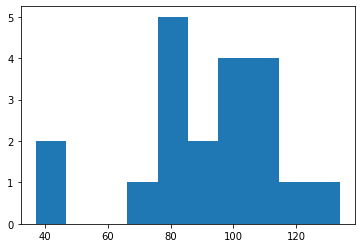

In [23]:
random.seed(1234)
matrix_corpus = generate_path_mazes(40000)
matrix_scores = score_mazes(matrix_corpus)


In [ ]:
import matplotlib.pyplot as plt
plt.hist(test_scores)

In [24]:
print(np.max(matrix_scores))
best_mat = matrix_corpus[np.argmax(matrix_scores)]
visualize_path(best_mat, get_paths(best_mat), GOALS[0], GOALS[len(GOALS) - 1])

192
+----------------+
|################|
|#sx###########e#|
|##x###########x#|
|##xx#xxx#####xx#|
|###xxx#x#####x##|
|#   x##xx####x##|
|  ##xx##x###xx##|
|  ###x##xx##x###|
|#  ##xx##x#xx###|
|##  ##xx#xxx####|
|###  ##x##  ####|
|####  #x##  ####|
|#####  xx#######|
|######  x#######|
|####### x#######|
|################|
+----------------+


In [25]:
random.seed(4321)
matrix_test_X = generate_path_mazes(2000)
matrix_test_y = [score_matrix(m) for m in matrix_test_X]

In [ ]:
# random.seed(4321)
# matrix_test_X = [generate_random_matrix(best) for i in range(2000)]
# matrix_test_y = [score_matrix(m) for m in matrix_test_X]

In [ ]:
# def get_collision_array(matrix, x, y):
#     if x < 0 or y < 0 or x >= WIDTH or y >= HEIGHT:
#         return 0
#     return matrix[y][x]

# def generate_collision_tensor(matrix):
#     return [[[ \
#         get_collision_array(matrix, x-1, y), \
#         get_collision_array(matrix, x+1, y), \
#         get_collision_array(matrix, x, y-1), \
#         get_collision_array(matrix, x, y+1) \
#     ] for x in range(WIDTH)] for y in range(HEIGHT)]
            
# test_collision = generate_collision_tensor(test_matrix)

# print(test_collision[0][0])
# print(test_collision[1][1])
# print(test_collision[2][2])
# print(test_collision[3][3])


# test_matrix

In [ ]:
# matrix_train_col_X = [generate_collision_tensor(m) for m in matrix_corpus]
# matrix_test_col_X = [generate_collision_tensor(m) for m in matrix_test_X]

In [26]:
file = open('train_X.data', 'wb')
np.save(file, np.array(matrix_corpus))
file.close()

file = open('train_Y.data', 'wb')
np.save(file, np.array(matrix_scores))
file.close()

file = open('test_X.data', 'wb')
np.save(file, np.array(matrix_test_X))
file.close()

file = open('test_Y.data', 'wb')
np.save(file, np.array(matrix_test_y))
file.close()

# file = open('train_col_X.data', 'wb')
# np.save(file, np.array(matrix_train_col_X))
# file.close()

# file = open('test_col_X.data', 'wb')
# np.save(file, np.array(matrix_test_col_X))
# file.close()
